In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
single_img = x_train[7]

In [6]:
single_img

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  38,  43,
        105, 255, 253, 253, 253, 253, 253, 174,   6,   0,   0,   0,   0,
          0,   0],
       [  

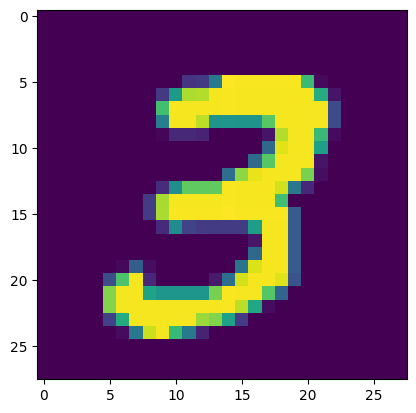

In [7]:
plt.imshow(single_img)

In [8]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [9]:
from tensorflow.keras.utils import to_categorical

In [10]:
y_train.shape

(60000,)

In [11]:
y_example = to_categorical(y_train)

In [12]:
y_example

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [13]:
y_example.shape

(60000, 10)

In [14]:
y_example[7]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

In [15]:
y_cat_test = to_categorical(y_test, 10)

In [16]:
y_cat_train = to_categorical(y_train, 10)

In [17]:
single_img.max()

np.uint8(255)

In [18]:
single_img.min()

np.uint8(0)

In [19]:
x_train = x_train/255

In [20]:
x_test = x_test/255

In [21]:
scaled_img = x_train[7]

In [22]:
scaled_img.max()

np.float64(1.0)

In [23]:
scaled_img.min()

np.float64(0.0)

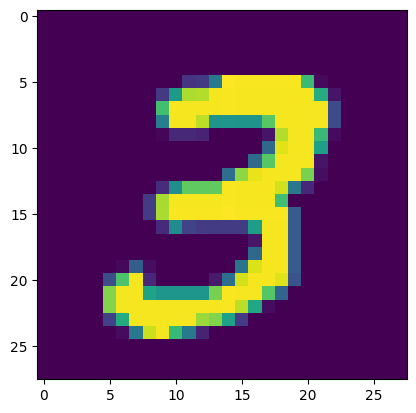

In [24]:
plt.imshow(scaled_img)

In [25]:
x_train.shape

(60000, 28, 28)

In [26]:
x_train = x_train.reshape(60000,28,28,1)

In [27]:
x_test.shape

(10000, 28, 28)

In [28]:
x_test = x_test.reshape(10000,28,28,1)

In [29]:
from tensorflow.keras.models import Sequential

In [30]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Input

In [31]:
28*28

784

In [32]:
model = Sequential()

model.add(Input(shape=(28,28,1)))
model.add(Conv2D(filters=32, kernel_size=(4,4) ,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [33]:
from tensorflow.keras.callbacks import EarlyStopping

In [34]:
early_stop = EarlyStopping(monitor='val_loss', patience=1)

In [35]:
model.fit(
    x_train, y_cat_train,
    epochs=10,
    validation_data=(x_test, y_cat_test),
    callbacks=[early_stop]
)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.9140 - loss: 0.2849 - val_accuracy: 0.9822 - val_loss: 0.0528
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9842 - loss: 0.0510 - val_accuracy: 0.9817 - val_loss: 0.0574


In [36]:
model.save('../models/mnist_prediction.keras')

In [37]:
metrics = pd.DataFrame(model.history.history)

<Axes: >

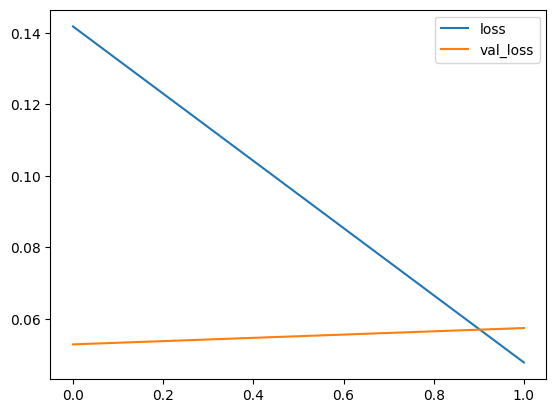

In [38]:
metrics[['loss', 'val_loss']].plot()

<Axes: >

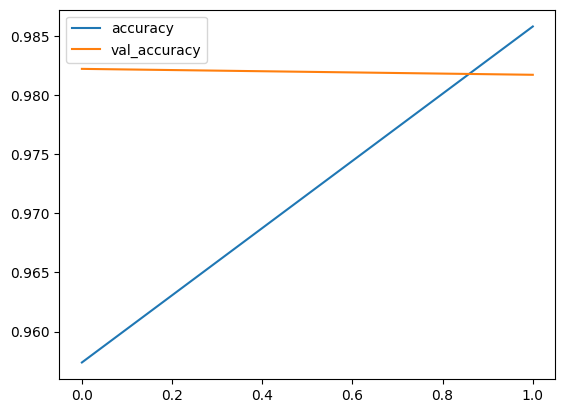

In [39]:
metrics[['accuracy', 'val_accuracy']].plot()

In [40]:
model.evaluate(x_test, y_cat_test, verbose=0)

[0.05739928409457207, 0.9817000031471252]

In [41]:
from sklearn.metrics import classification_report, confusion_matrix

In [42]:
predictions = model.predict(x_test)

predicted_classes = np.argmax(predictions, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [43]:
y_cat_test.shape

(10000, 10)

In [44]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [45]:
print(classification_report(y_test, predicted_classes))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      0.98      0.99      1135
           2       0.94      1.00      0.97      1032
           3       0.99      0.98      0.99      1010
           4       0.99      0.98      0.99       982
           5       0.96      0.99      0.98       892
           6       1.00      0.98      0.99       958
           7       0.99      0.98      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.99      0.95      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [46]:
print(confusion_matrix(y_test, predicted_classes))

[[ 971    0    4    1    0    2    1    0    1    0]
 [   5 1116    5    0    0    4    2    1    2    0]
 [   0    0 1028    2    0    0    0    2    0    0]
 [   0    0    8  992    0    7    0    0    3    0]
 [   1    0    6    0  961    0    0    1    3   10]
 [   0    0    1    2    0  887    1    0    1    0]
 [   3    1    1    1    1    7  943    0    1    0]
 [   0    1   17    1    0    0    0 1007    1    1]
 [   2    0   10    1    0    2    0    1  958    0]
 [   2    2    8    4    5   16    0    9    9  954]]


In [47]:
my_number = x_test[7]

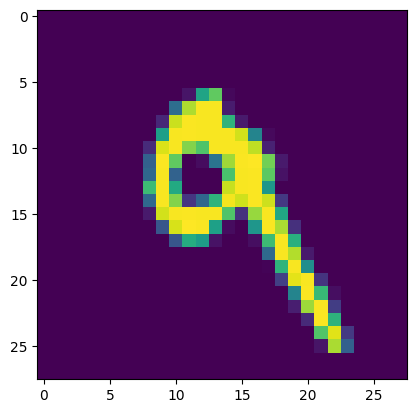

In [48]:
plt.imshow(my_number.reshape(28,28))

In [49]:
pred = model.predict(my_number.reshape(1, 28, 28, 1))

predicted_digit = np.argmax(pred)

print("Predicted digit:", predicted_digit)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Predicted digit: 9
